In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner

In [18]:
datagen=ImageDataGenerator(rescale=1/255,
                          rotation_range=20,
                           width_shift_range=0.2,
                           height_shift_range=0.2,
                           horizontal_flip=True)

## Splitiing Data

In [19]:
import splitfolders

In [20]:
input_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Covid_Xray\\Dataset\\all'
outpu_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Covid_Xray\\Dataset\\split'

In [21]:
'''splitfolders.ratio(input=input_dir,
    output=outpu_dir,
    seed=1337,
    ratio=(0.8, 0.1, 0.1))'''

'splitfolders.ratio(input=input_dir,\n    output=outpu_dir,\n    seed=1337,\n    ratio=(0.8, 0.1, 0.1))'

## Model

In [22]:
from keras.layers import Conv2D, MaxPooling2D,Flatten, Dense,Dropout 
from keras.models import Sequential

In [23]:
def build_model(hp):
    model =Sequential()
    model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Conv2D(128,(3,3),activation='relu'))
    model.add(MaxPooling2D((2,2)))

    model.add(Flatten())

    model.add(Dense(units=hp.Choice('layes size',[64,128,256,512]),activation='relu'))

    model.add(Dense(2,activation='softmax')) 
    
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return model

In [24]:
train_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Covid_Xray\\Dataset\\Split\\train'
test_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Covid_Xray\\Dataset\\Split\\test'
val_dir='D:\\DATA Science\\DEEP LEARNING\\CNN\\Covid_Xray\\Dataset\\Split\\val'

In [25]:
train_itt=datagen.flow_from_directory(train_dir,target_size=(100, 100),batch_size=32)
test_itt=datagen.flow_from_directory(test_dir,target_size=(100, 100),batch_size=32)
val_itt=datagen.flow_from_directory(val_dir,target_size=(100, 100),batch_size=32)

Found 224 images belonging to 2 classes.
Found 28 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


In [26]:
tuner = keras_tuner.RandomSearch(hypermodel=build_model,
    objective="val_accuracy",
    max_trials=4,
    overwrite=True,
    directory="hyp_try",
    project_name="hyp_try")

In [27]:
tuner.search_space_summary()
tuner.search(train_itt,validation_data=test_itt,epochs=8)

Trial 4 Complete [00h 01m 58s]
val_accuracy: 0.9642857313156128

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 08m 37s
INFO:tensorflow:Oracle triggered exit


In [28]:
best_model=tuner.get_best_models()[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [29]:
best_model.evaluate(val_itt)

1/1 [==============================] - 2s 2s/step - loss: 0.2374 - accuracy: 0.8929


[0.23735639452934265, 0.8928571343421936]

In [30]:
class_label=train_itt.class_indices
class_label

{'covid': 0, 'normal': 1}

In [33]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [35]:
def prediction(path):
    image=load_img(path,target_size=(100,100))
    plt.imshow(image)
    plt.show()
    image=img_to_array(image)
    image=image.reshape(1,100,100,3)
    result=best_model.predict(image)
    result=np.argmax(result)
    return print([key for key in class_label][result])

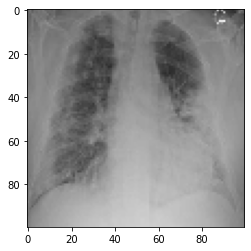

covid


In [36]:
prediction('6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg')

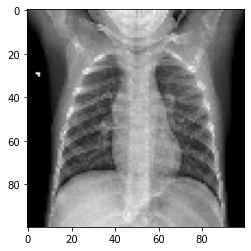

normal


In [37]:
prediction('IM-0154-0001.jpeg')